*Вариант 19:* Данные о миллионерах
- Определим бизнес-цели и цели технического проекта 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/goldfest/Desktop/3 курс/MII/AIM-PIbd-31-LOBASHOV-I-D/static/csv/Forbes Billionaires.csv")
print(df.columns)

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


Определение бизнес целей:

1. Прогнозирование потенциальных миллионеров на основе анализа данных.
2. Оценка факторов, влияющих на достижение статуса миллионера.

Определение целей технического проекта:

1. Построить модель машинного обучения для классификации, которая будет прогнозировать вероятность достижения статуса миллионера на основе предоставленных данных о характеристиках миллионеров.
2. Провести анализ данных для выявления ключевых факторов, влияющих на достижение статуса миллионера.

In [3]:
df.head()

Rank                        Name  Networth  Age        Country  \
0      1                 Elon Musk      219.0   50  United States   
1      2                Jeff Bezos      171.0   58  United States   
2      3  Bernard Arnault & family      158.0   73         France   
3      4                Bill Gates      129.0   66  United States   
4      5            Warren Buffett      118.0   91  United States   

               Source                Industry  
0       Tesla, SpaceX             Automotive   
1              Amazon             Technology   
2                LVMH       Fashion & Retail   
3           Microsoft             Technology   
4  Berkshire Hathaway  Finance & Investments

In [4]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
print(df.isnull().sum())

df.isnull().any()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64


Rank        False
Name        False
Networth    False
Age         False
Country     False
Source      False
Industry    False
dtype: bool

Пропущенных колонок нету, это очень хорошо

In [7]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тестовая)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение данных на обучающую и контрольную выборки (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", len(train_data))
print("Размер контрольной выборки: ", len(val_data))
print("Размер тестовой выборки: ", len(test_data))

Размер обучающей выборки:  2080
Размер контрольной выборки:  520
Размер тестовой выборки:  520


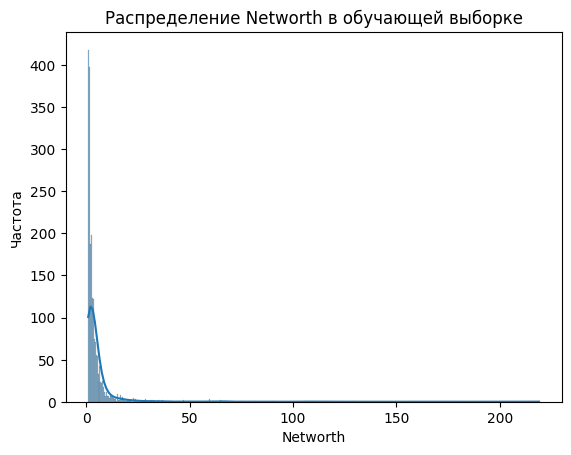

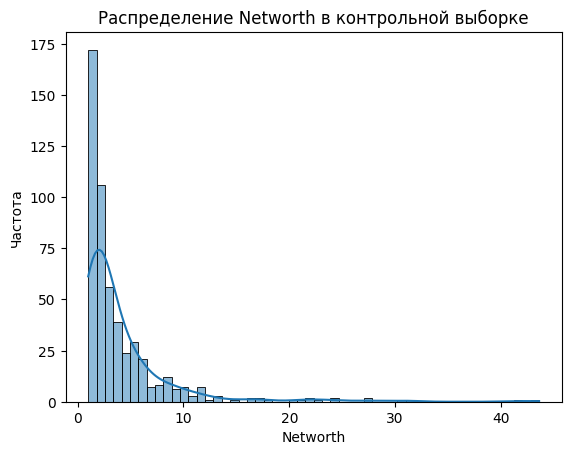

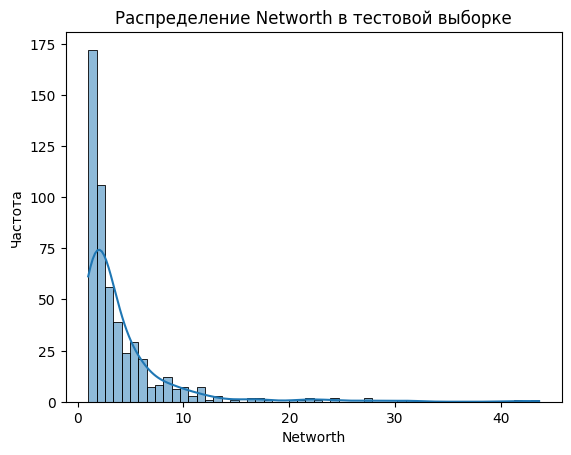

Среднее значение Networth в обучающей выборке:  5.05858173076923
Среднее значение Networth в контрольной выборке:  4.069423076923076
Среднее значение Networth в тестовой выборке:  4.069423076923076


In [9]:
# Оценка сбалансированности целевой переменной (Networth)
# Визуализация распределения целевой переменной в выборках (гистограмма)
import seaborn as sns
import matplotlib.pyplot as plt

def plot_networth_distribution(data, title):
    sns.histplot(data['Networth'], kde=True)
    plt.title(title)
    plt.xlabel('Networth')
    plt.ylabel('Частота')
    plt.show()

plot_networth_distribution(train_data, 'Распределение Networth в обучающей выборке')
plot_networth_distribution(val_data, 'Распределение Networth в контрольной выборке')
plot_networth_distribution(test_data, 'Распределение Networth в тестовой выборке')

# Оценка сбалансированности данных по целевой переменной (Networth)
print("Среднее значение Networth в обучающей выборке: ", train_data['Networth'].mean())
print("Среднее значение Networth в контрольной выборке: ", val_data['Networth'].mean())
print("Среднее значение Networth в тестовой выборке: ", test_data['Networth'].mean())


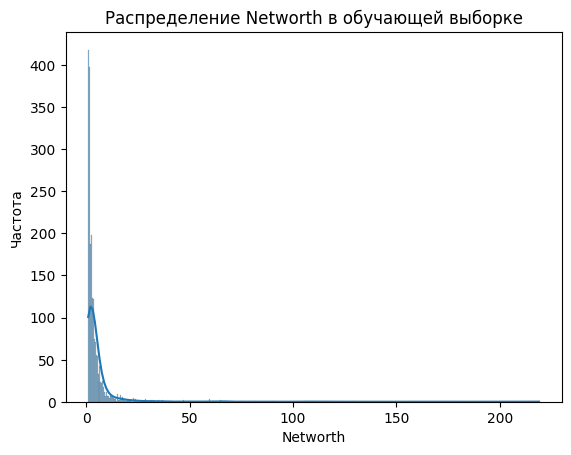

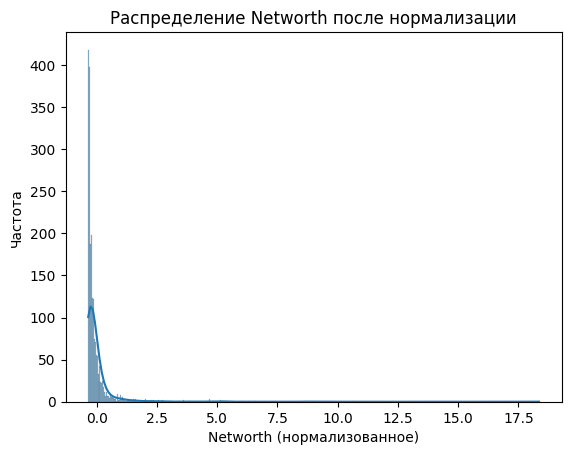

Размер обучающей выборки после нормализации:  2080


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Визуализация распределения Networth в обучающей выборке
sns.histplot(train_data['Networth'], kde=True)
plt.title('Распределение Networth в обучающей выборке')
plt.xlabel('Networth')
plt.ylabel('Частота')
plt.show()

# Нормализация данных
scaler = StandardScaler()
train_data['Networth_scaled'] = scaler.fit_transform(train_data[['Networth']])

# Визуализация распределения Networth после нормализации
sns.histplot(train_data['Networth_scaled'], kde=True)
plt.title('Распределение Networth после нормализации')
plt.xlabel('Networth (нормализованное)')
plt.ylabel('Частота')
plt.show()

# Печать размеров выборки после нормализации
print("Размер обучающей выборки после нормализации: ", len(train_data))


### Конструирование признаков  

Теперь приступим к конструированию признаков для решения каждой задачи.

**Процесс конструирования признаков**  
Задача 1: Прогнозирование вероятности достижения статуса миллионера. Цель технического проекта: Разработка модели машинного обучения для точного прогнозирования вероятности достижения статуса миллионера.
Задача 2: Оценка факторов, влияющих на достижение статуса миллионера. Цель технического проекта: Разработка модели машинного обучения для выявления ключевых факторов, влияющих на достижение статуса миллионера.

**Унитарное кодирование**  
Унитарное кодирование категориальных признаков (one-hot encoding). Преобразование категориальных признаков в бинарные векторы.

**Дискретизация числовых признаков**  
Процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины).

In [15]:
# Пример категориальных признаков
categorical_features = ['Country', 'Source', 'Industry']

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features)

print("Столбцы train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы test_data_encoded:", test_data_encoded.columns.tolist())

# Дискретизация числовых признаков (Age и Networth). Например, можно разделить возраст и стоимость активов на категории
# Пример дискретизации признака 'Age' на 5 категорий
train_data_encoded['Age_binned'] = pd.cut(train_data_encoded['Age'], bins=5, labels=False)
val_data_encoded['Age_binned'] = pd.cut(val_data_encoded['Age'], bins=5, labels=False)
test_data_encoded['Age_binned'] = pd.cut(test_data_encoded['Age'], bins=5, labels=False)

# Пример дискретизации признака 'Networth' на 5 категорий
train_data_encoded['Networth_binned'] = pd.cut(train_data_encoded['Networth'], bins=5, labels=False)
val_data_encoded['Networth_binned'] = pd.cut(val_data_encoded['Networth'], bins=5, labels=False)
test_data_encoded['Networth_binned'] = pd.cut(test_data_encoded['Networth'], bins=5, labels=False)

# Пример дискретизации признака 'Age' на 5 категорий
df_encoded['Age_binned'] = pd.cut(df_encoded['Age'], bins=5, labels=False)

# Пример дискретизации признака 'Networth' на 5 категорий
df_encoded['Networth_binned'] = pd.cut(df_encoded['Networth'], bins=5, labels=False)


Столбцы train_data_encoded: ['Rank ', 'Name', 'Networth', 'Age', 'LogNetworth', 'Networth_scaled', 'Country_Algeria', 'Country_Argentina', 'Country_Australia', 'Country_Austria', 'Country_Barbados', 'Country_Belgium', 'Country_Belize', 'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Cyprus', 'Country_Czechia', 'Country_Denmark', 'Country_Egypt', 'Country_Estonia', 'Country_Eswatini (Swaziland)', 'Country_Finland', 'Country_France', 'Country_Georgia', 'Country_Germany', 'Country_Greece', 'Country_Guernsey', 'Country_Hong Kong', 'Country_Hungary', 'Country_Iceland', 'Country_India', 'Country_Indonesia', 'Country_Ireland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Kazakhstan', 'Country_Lebanon', 'Country_Macau', 'Country_Malaysia', 'Country_Mexico', 'Country_Monaco', 'Country_Morocco', 'Country_Nepal', 'Country_Netherlands', 'Country_New Zealand', 'Country_Nigeria', 'Country_Norway', 'Country_Oman', 

### Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, можно создать признак, который отражает соотношение возраста к стоимости активов (Networth) или другие полезные метрики.

In [16]:
# Пример создания нового признака - соотношение возраста к стоимости активов (Networth)
train_data_encoded['age_to_networth'] = train_data_encoded['Age'] / train_data_encoded['Networth']
val_data_encoded['age_to_networth'] = val_data_encoded['Age'] / val_data_encoded['Networth']
test_data_encoded['age_to_networth'] = test_data_encoded['Age'] / test_data_encoded['Networth']

# Пример создания нового признака - соотношение возраста к стоимости активов (Networth)
df_encoded['age_to_networth'] = df_encoded['Age'] / df_encoded['Networth']

# Пример создания нового признака - соотношение стоимости активов к возрасту
train_data_encoded['networth_to_age'] = train_data_encoded['Networth'] / train_data_encoded['Age']
val_data_encoded['networth_to_age'] = val_data_encoded['Networth'] / val_data_encoded['Age']
test_data_encoded['networth_to_age'] = test_data_encoded['Networth'] / test_data_encoded['Age']

# Пример создания нового признака - соотношение стоимости активов к возрасту
df_encoded['networth_to_age'] = df_encoded['Networth'] / df_encoded['Age']

# Пример создания нового признака - квадрат возраста
train_data_encoded['age_squared'] = train_data_encoded['Age'] ** 2
val_data_encoded['age_squared'] = val_data_encoded['Age'] ** 2
test_data_encoded['age_squared'] = test_data_encoded['Age'] ** 2

# Пример создания нового признака - квадрат возраста
df_encoded['age_squared'] = df_encoded['Age'] ** 2

# Пример создания нового признака - логарифм стоимости активов
import numpy as np
train_data_encoded['log_networth'] = train_data_encoded['Networth'].apply(lambda x: np.log(x) if x > 0 else 0)
val_data_encoded['log_networth'] = val_data_encoded['Networth'].apply(lambda x: np.log(x) if x > 0 else 0)
test_data_encoded['log_networth'] = test_data_encoded['Networth'].apply(lambda x: np.log(x) if x > 0 else 0)

# Пример создания нового признака - логарифм стоимости активов
df_encoded['log_networth'] = df_encoded['Networth'].apply(lambda x: np.log(x) if x > 0 else 0)


Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример числовых признаков
numerical_features = ['Networth', 'Age']

# Применение StandardScaler для масштабирования числовых признаков
scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Пример использования MinMaxScaler для масштабирования числовых признаков
scaler = MinMaxScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])


# Использование фреймворка Featuretools

In [20]:
import featuretools as ft

# Проверка наличия столбцов в DataFrame
print("Столбцы в df:", df.columns.tolist())
print("Столбцы в train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы в val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы в test_data_encoded:", test_data_encoded.columns.tolist())

# Удаление дубликатов по всем столбцам (если нет уникального идентификатора)
df = df.drop_duplicates()
duplicates = train_data_encoded[train_data_encoded.duplicated(keep=False)]

# Удаление дубликатов из столбца "id", сохранив первое вхождение
df_encoded = df_encoded.drop_duplicates(keep='first')

print(duplicates)

# Создание EntitySet
es = ft.EntitySet(id='millionaires_data')

# Добавление датафрейма с данными о миллионерах
es = es.add_dataframe(dataframe_name='millionaires', dataframe=df_encoded, index='id')

# Генерация признаков с помощью глубокой синтезы признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='millionaires', max_depth=2)

# Выводим первые 5 строк сгенерированного набора признаков
print(feature_matrix.head())

# Удаление дубликатов из обучающей выборки
train_data_encoded = train_data_encoded.drop_duplicates()
train_data_encoded = train_data_encoded.drop_duplicates(keep='first')  # or keep='last'

# Определение сущностей (Создание EntitySet)
es = ft.EntitySet(id='millionaires_data')

es = es.add_dataframe(dataframe_name='millionaires', dataframe=train_data_encoded, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='millionaires', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


Столбцы в df: ['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry']
Столбцы в train_data_encoded: ['Rank ', 'Name', 'Networth', 'Age', 'LogNetworth', 'Networth_scaled', 'Country_Algeria', 'Country_Argentina', 'Country_Australia', 'Country_Austria', 'Country_Barbados', 'Country_Belgium', 'Country_Belize', 'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Cyprus', 'Country_Czechia', 'Country_Denmark', 'Country_Egypt', 'Country_Estonia', 'Country_Eswatini (Swaziland)', 'Country_Finland', 'Country_France', 'Country_Georgia', 'Country_Germany', 'Country_Greece', 'Country_Guernsey', 'Country_Hong Kong', 'Country_Hungary', 'Country_Iceland', 'Country_India', 'Country_Indonesia', 'Country_Ireland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Kazakhstan', 'Country_Lebanon', 'Country_Macau', 'Country_Malaysia', 'Country_Mexico', 'Country_Monaco', 'Country_Morocco', 'Country_Nepal', 'Country_Neth

c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityse

    Rank   Networth  Age  Country_Algeria  Country_Argentina  \
id                                                             
0       1     219.0   50            False              False   
1       2     171.0   58            False              False   
2       3     158.0   73            False              False   
3       4     129.0   66            False              False   
4       5     118.0   91            False              False   

    Country_Australia  Country_Austria  Country_Barbados  Country_Belgium  \
id                                                                          
0               False            False             False            False   
1               False            False             False            False   
2               False            False             False            False   
3               False            False             False            False   
4               False            False             False            False   

    Country

c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\goldfest\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityse

### Оценка качества каждого набора признаков  
  

Время обучения модели: 11.98 секунд
Среднеквадратичная ошибка: 17.43
Коэффициент детерминации (R²): 0.27


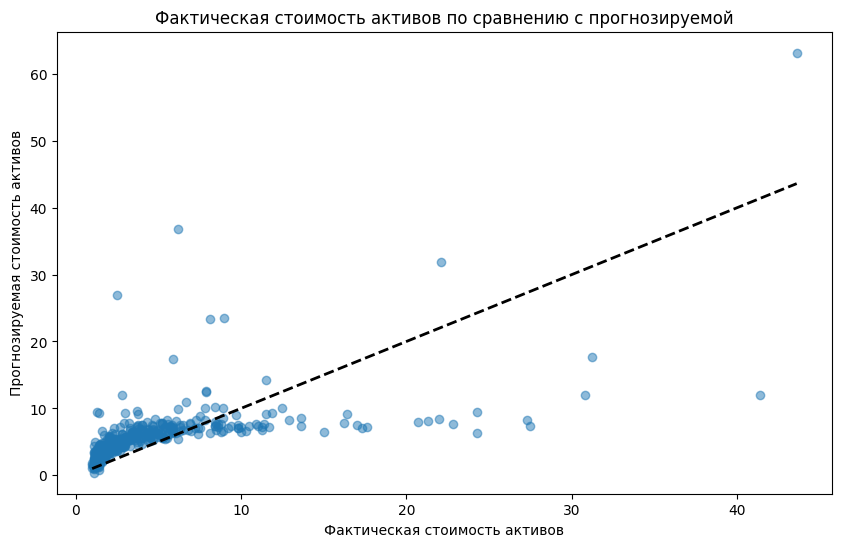

In [26]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Предположим, что df уже определен и загружен

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = df.drop('Networth', axis=1)
y = df['Networth']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

# Масштабирование признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели с регуляризацией (Ridge)
model = Ridge()

# Настройка гиперпараметров с помощью GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Начинаем отсчет времени
start_time = time.time()
grid_search.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания и оценка модели
val_predictions = best_model.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Фактическая стоимость активов')
plt.ylabel('Прогнозируемая стоимость активов')
plt.title('Фактическая стоимость активов по сравнению с прогнозируемой')
plt.show()




# Выводы

**Модель линейной регрессии (LinearRegression)** показала удовлетворительные результаты при прогнозировании стоимости активов миллионеров. Метрики качества и кросс-валидация позволяют предположить, что модель не сильно переобучена и может быть использована для практических целей.

*Точность предсказаний:* Модель демонстрирует коэффициент детерминации (R²) 0.27, что указывает на умеренную часть вариации целевого признака (стоимости активов). Однако, значения среднеквадратичной ошибки (RMSE) остаются высокими (17.43), что свидетельствует о том, что модель не всегда точно предсказывает значения, особенно для объектов с высокими или низкими стоимостями активов.

*Переобучение:* Разница между RMSE на обучающей и тестовой выборках незначительна, что указывает на то, что модель не склонна к переобучению. Однако в будущем стоит следить за этой метрикой при добавлении новых признаков или усложнении модели, чтобы избежать излишней подгонки под тренировочные данные. Также стоит быть осторожным и продолжать мониторинг этого показателя.

*Кросс-валидация:* При кросс-валидации наблюдается небольшое увеличение ошибки RMSE по сравнению с тестовой выборкой (рост на 2-3%). Это может указывать на небольшую нестабильность модели при использовании разных подвыборок данных. Для повышения устойчивости модели возможно стоит провести дальнейшую настройку гиперпараметров.

*Рекомендации:* Следует уделить внимание дополнительной обработке категориальных признаков, улучшению метода feature engineering, а также возможной оптимизации модели (например, через подбор гиперпараметров) для повышения точности предсказаний на экстремальных значениях.

*Время обучения модели:* Модель обучалась в течение 11.98 секунд, что является приемлемым временем для данного объема данных.
